In [41]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import tensorflow as tf

CO2_df = pd.read_csv('owid-co2-data.csv')
CO2_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [42]:
CO2_df.dtypes

iso_code                                object
country                                 object
year                                     int64
co2                                    float64
co2_per_capita                         float64
trade_co2                              float64
cement_co2                             float64
cement_co2_per_capita                  float64
coal_co2                               float64
coal_co2_per_capita                    float64
flaring_co2                            float64
flaring_co2_per_capita                 float64
gas_co2                                float64
gas_co2_per_capita                     float64
oil_co2                                float64
oil_co2_per_capita                     float64
other_industry_co2                     float64
other_co2_per_capita                   float64
co2_growth_prct                        float64
co2_growth_abs                         float64
co2_per_gdp                            float64
co2_per_unit_

In [43]:
# Dropping Columns that have more than 90% Nan Values
CO2_df.dropna(thresh=len(CO2_df)*0.9, axis='columns')
# CO2_df = CO_df.reset_index()

,country,year,co2,co2_per_capita,co2_growth_prct,co2_growth_abs,cumulative_co2,share_global_co2,share_global_cumulative_co2,population
0,Afghanistan,1949,0.015,0.002,NaN,NaN,0.015,0.00,0.00,7624058.0
1,Afghanistan,1950,0.084,0.011,475.00,0.070,0.099,0.00,0.00,7752117.0
2,Afghanistan,1951,0.092,0.012,8.70,0.007,0.191,0.00,0.00,7840151.0
3,Afghanistan,1952,0.092,0.012,0.00,0.000,0.282,0.00,0.00,7935996.0
4,Afghanistan,1953,0.106,0.013,16.00,0.015,0.388,0.00,0.00,8039684.0
...,...,...,...,...,...,...,...,...,...,...
25186,Zimbabwe,2016,10.738,0.765,-12.17,-1.488,736.467,0.03,0.05,14030338.0
25187,Zimbabwe,2017,9.582,0.673,-10.77,-1.156,746.049,0.03,0.05,14236599.0
25188,Zimbabwe,2018,11.854,0.821,23.72,2.273,757.903,0.03,0.05,14438812.0
25189,Zimbabwe,2019,10.949,0.748,-7.64,-0.905,768.852,0.03,0.05,14645473.0


In [44]:
usa_df = CO2_df[CO2_df['country'].isin(['United States'])]
usa_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,USA,United States,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,USA,United States,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,USA,United States,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,USA,United States,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,USA,United States,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,USA,United States,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,USA,United States,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,USA,United States,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,USA,United States,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [45]:
# Drop the non-beneficial ID columns
usa_df = usa_df.drop(columns=["iso_code","country"], axis=1)
usa_df

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,0.161,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,0.173,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,0.217,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,0.257,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [46]:
# Dropping Columns that have more than 90% Nan Values
usa_df.dropna(thresh=len(usa_df)*0.9, axis='columns')

,year,co2,co2_per_capita,coal_co2,coal_co2_per_capita,co2_growth_prct,co2_growth_abs,co2_per_gdp,cumulative_co2,cumulative_coal_co2,share_global_co2,share_global_coal_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,population,gdp
23834,1800,0.253,0.042,0.253,0.042,NaN,NaN,NaN,0.253,0.253,0.90,0.90,0.03,0.03,6000000.0,NaN
23835,1801,0.267,0.044,0.267,0.044,5.80,0.015,NaN,0.520,0.520,0.96,0.96,0.06,0.06,6113782.0,NaN
23836,1802,0.289,0.046,0.289,0.046,8.22,0.022,NaN,0.810,0.810,0.79,0.79,0.10,0.10,6229723.0,NaN
23837,1803,0.297,0.047,0.297,0.047,2.53,0.007,NaN,1.107,1.107,0.94,0.94,0.13,0.13,6347862.0,NaN
23838,1804,0.333,0.052,0.333,0.052,12.35,0.037,NaN,1.440,1.440,0.97,0.97,0.16,0.16,6468241.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,2016,5248.024,16.247,1379.744,4.271,-2.30,-123.747,0.306,396171.260,171040.485,14.80,9.61,25.52,23.41,323015992.0,1.716256e+13
24051,2017,5207.751,16.020,1338.667,4.118,-0.77,-40.273,0.296,401379.012,172379.152,14.50,9.26,25.27,23.14,325084758.0,1.759628e+13
24052,2018,5375.491,16.434,1283.532,3.924,3.22,167.739,0.296,406754.502,173662.684,14.67,8.72,25.03,22.86,327096263.0,1.814065e+13
24053,2019,5255.816,15.972,1098.854,3.339,-2.23,-119.674,NaN,412010.318,174761.538,14.32,7.54,24.79,22.57,329064917.0,NaN


In [47]:
# Dropping Rows that have more than 90% Nan Values
# usa_df.dropna(thresh=len(usa_df)*0.3, axis='rows')

In [48]:
# Generate our categorical variable list
usa_cat = usa_df.dtypes[usa_df.dtypes == "float64"].index.tolist()

# Check the number of unique values in each column
usa_df[usa_cat].nunique()

co2                                    220
co2_per_capita                         216
trade_co2                               30
cement_co2                             108
cement_co2_per_capita                   57
coal_co2                               220
coal_co2_per_capita                    215
flaring_co2                             70
flaring_co2_per_capita                  57
gas_co2                                138
gas_co2_per_capita                     138
oil_co2                                161
oil_co2_per_capita                     157
other_industry_co2                      94
other_co2_per_capita                    64
co2_growth_prct                        214
co2_growth_abs                         208
co2_per_gdp                            184
co2_per_unit_energy                     20
consumption_co2                         30
consumption_co2_per_capita              30
consumption_co2_per_gdp                 27
cumulative_co2                         221
cumulative_

In [49]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
usa_df = usa_df.drop(columns=["share_global_co2",
                              "share_global_cement_co2",
                              "share_global_coal_co2",
                              "share_global_flaring_co2",              
                              "share_global_gas_co2",                   
                              "share_global_oil_co2",                 
                              "share_global_other_co2",                  
                              "share_global_cumulative_co2",          
                              "share_global_cumulative_cement_co2",    
                              "share_global_cumulative_coal_co2",       
                              "share_global_cumulative_flaring_co2",     
                              "share_global_cumulative_gas_co2",        
                              "share_global_cumulative_oil_co2",        
                              "share_global_cumulative_other_co2",      
                              "total_ghg"
                              ], axis=1)
usa_df

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,0.161,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,0.173,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,0.217,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,0.257,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [50]:
co2_counts = usa_df.co2.value_counts()
co2_counts

0.333       2
272.162     1
26.791      1
1052.813    1
4663.165    1
           ..
45.320      1
1203.861    1
33.159      1
5421.502    1
24.633      1
Name: co2, Length: 220, dtype: int64

<AxesSubplot:ylabel='Density'>

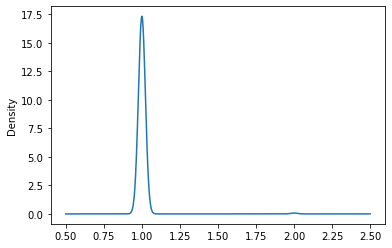

In [51]:
# Visualize the value counts
co2_counts.plot.density()

In [52]:
for column in usa_df.columns:
    print(f"column {column} has {usa_df[column].isnull().sum()} null values")

column year has 0 null values
column co2 has 0 null values
column co2_per_capita has 0 null values
column trade_co2 has 191 null values
column cement_co2 has 80 null values
column cement_co2_per_capita has 80 null values
column coal_co2 has 0 null values
column coal_co2_per_capita has 0 null values
column flaring_co2 has 150 null values
column flaring_co2_per_capita has 150 null values
column gas_co2 has 82 null values
column gas_co2_per_capita has 82 null values
column oil_co2 has 60 null values
column oil_co2_per_capita has 60 null values
column other_industry_co2 has 104 null values
column other_co2_per_capita has 104 null values
column co2_growth_prct has 1 null values
column co2_growth_abs has 1 null values
column co2_per_gdp has 22 null values
column co2_per_unit_energy has 166 null values
column consumption_co2 has 191 null values
column consumption_co2_per_capita has 191 null values
column consumption_co2_per_gdp has 192 null values
column cumulative_co2 has 0 null values
colum

In [53]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [54]:
# Remove outcome target from features data
y = usa_df.co2 
X = usa_df.drop(columns="co2")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
X

,year,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23834,1800,0.042,NaN,NaN,NaN,0.253,0.042,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
23835,1801,0.044,NaN,NaN,NaN,0.267,0.044,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
23836,1802,0.046,NaN,NaN,NaN,0.289,0.046,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
23837,1803,0.047,NaN,NaN,NaN,0.297,0.047,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
23838,1804,0.052,NaN,NaN,NaN,0.333,0.052,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,2016,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,0.161,1502.475,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24051,2017,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,0.173,1480.059,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24052,2018,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,0.217,1641.041,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24053,2019,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,0.257,1694.894,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [56]:
y

23834       0.253
23835       0.267
23836       0.289
23837       0.297
23838       0.333
           ...   
24050    5248.024
24051    5207.751
24052    5375.491
24053    5255.816
24054    4712.771
Name: co2, Length: 221, dtype: float64

In [57]:
usa_df = usa_df.reset_index()
usa_df

,index,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,23834,1800,0.253,0.042,NaN,NaN,NaN,0.253,0.042,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
1,23835,1801,0.267,0.044,NaN,NaN,NaN,0.267,0.044,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782.0,NaN,NaN,NaN,NaN
2,23836,1802,0.289,0.046,NaN,NaN,NaN,0.289,0.046,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723.0,NaN,NaN,NaN,NaN
3,23837,1803,0.297,0.047,NaN,NaN,NaN,0.297,0.047,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862.0,NaN,NaN,NaN,NaN
4,23838,1804,0.333,0.052,NaN,NaN,NaN,0.333,0.052,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,24050,2016,5248.024,16.247,328.696,39.439,0.122,1379.744,4.271,51.908,...,18.288,609.89,1.888,249.26,0.772,323015992.0,1.716256e+13,25560.520,79130.818,1.486
217,24051,2017,5207.751,16.020,343.021,40.324,0.124,1338.667,4.118,56.186,...,17.973,615.77,1.894,250.68,0.771,325084758.0,1.759628e+13,25647.389,78894.410,NaN
218,24052,2018,5375.491,16.434,351.120,38.971,0.119,1283.532,3.924,71.008,...,18.415,623.77,1.907,251.35,0.768,327096263.0,1.814065e+13,26556.388,81188.359,NaN
219,24053,2019,5255.816,15.972,369.967,40.896,0.124,1098.854,3.339,84.510,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [58]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [60]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
6/6 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/50
6/6 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 11/50
6/6 [==========

In [ ]:
population_counts = usa_df.population.value_counts()
population_counts

In [ ]:
capita_co2_counts= CO2_df.co2_per_capita.value_counts()
capita_co2_counts

In [ ]:
capita_co2_counts.plot.density()

In [ ]:
    
for column in all_homes_df.columns:
    print(f"column {column} has {all_homes_df[column].isnull().sum()} null values")

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20